order_recency
0-30 days      48132
31-60 days     26370
61-90 days     20055
91-120 days    16543
120+ days      35440
Name: count, dtype: int64
used_discount  False  True 
order_recency              
0-30 days      13611  34521
31-60 days      7156  19214
61-90 days      5246  14809
91-120 days     4514  12029
120+ days      10569  24871


/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_32529/3460699658.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_32529/3460699658.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates.loc[:, 'days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c00

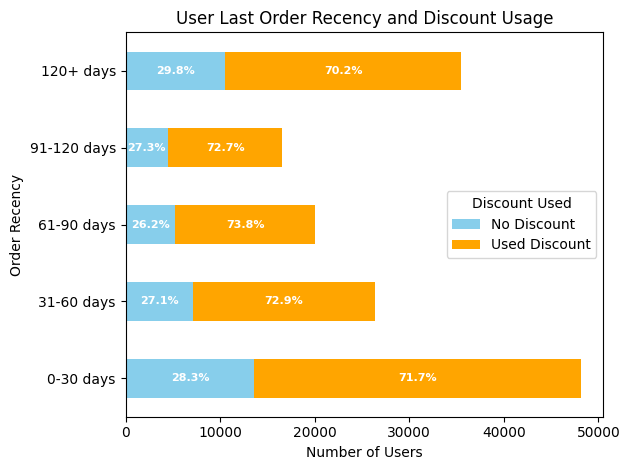

In [2]:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/levankikadze/Desktop/pandas/Bolt Food/cherningUsers/Data/UserOrdersTotal_past1yr.csv", index_col=0)

# Preview data
df.head()

# Sort by order date descending
df.sort_values(by='Order Created Date', ascending=False, inplace=True)

# Get latest order per user
latest_order_dates = df.drop_duplicates(subset='User ID', keep='first')

# Ensure 'Order Created Date' is datetime
latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])

# Calculate days since last order
today = pd.Timestamp(datetime.today().date())
latest_order_dates.loc[:, 'days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days

# Define bins and labels
bins = [0, 30, 60, 90, 120, np.inf]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '120+ days']

# Categorize users by recency
latest_order_dates.loc[:, 'order_recency'] = pd.cut(latest_order_dates['days_since_last_order'], bins=bins, labels=labels, right=True)

# Count users in each group
recency_counts = latest_order_dates['order_recency'].value_counts().sort_index()
print(recency_counts)

# Clean discount column and create discount usage flag
latest_order_dates.loc[:, 'Campaigns Discount, $'] = latest_order_dates['Campaigns Discount, $'].replace(r'[\$,]', '', regex=True).astype(float)
latest_order_dates.loc[:, 'used_discount'] = latest_order_dates['Campaigns Discount, $'] > 0

# Group by recency and discount usage, then count
discount_counts = latest_order_dates.groupby(['order_recency', 'used_discount'], observed=True).size().unstack(fill_value=0)
print(discount_counts)

# Reorder columns: No Discount (False) first, Used Discount (True) second
discount_counts = discount_counts.reindex(columns=[False, True])

# Visualisation: stacked horizontal bar chart
ax = discount_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.title('User Last Order Recency and Discount Usage')
plt.xlabel('Number of Users')
plt.ylabel('Order Recency')
plt.legend(['No Discount', 'Used Discount'], title='Discount Used')
plt.tight_layout()

# Add percentage labels inside bars (only if >5% for clarity)
discount_percentages = discount_counts.div(discount_counts.sum(axis=1), axis=0) * 100
for i, (idx, row) in enumerate(discount_percentages.iterrows()):
    left = 0
    for col in discount_percentages.columns:
        value = discount_counts.loc[idx, col]
        percent = discount_percentages.loc[idx, col]
        if value > 0 and percent > 5:
            ax.text(left + value/2, i, f"{percent:.1f}%", va='center', ha='center', color='white', fontsize=8, fontweight='bold')
        left += value

plt.show()

order_recency
0-30 days       9435
31-60 days      7371
61-90 days      8047
91-120 days     7595
120+ days      21420
Name: count, dtype: int64
used_discount  False  True 
order_recency              
0-30 days       1775   7660
31-60 days      1515   5856
61-90 days      1302   6745
91-120 days     1156   6439
120+ days       4847  16573


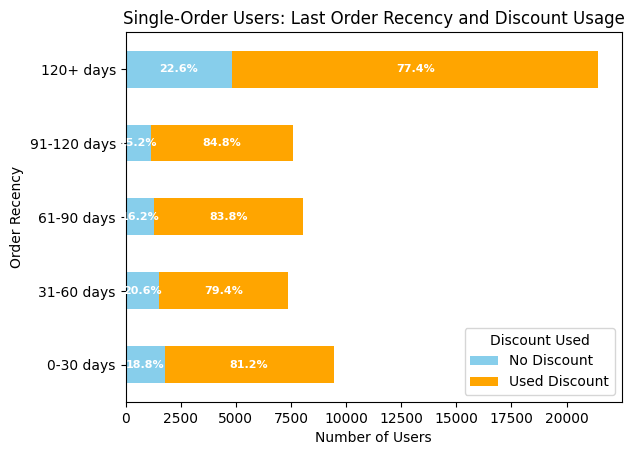

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/levankikadze/Desktop/cherningUsers/Data/UserOrdersTotal_past1yr.csv", index_col=0)

# Filter for users with only one order
user_counts = df['User ID'].value_counts()
single_order_users = user_counts[user_counts == 1].index
df_single = df[df['User ID'].isin(single_order_users)].copy()

# Sort by order date descending
df_single.sort_values(by='Order Created Date', ascending=False, inplace=True)

# Get latest order per user (redundant here, but keeps structure)
latest_order_dates = df_single.drop_duplicates(subset='User ID', keep='first')

# Ensure 'Order Created Date' is datetime
latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'])

# Calculate days since last order
today = pd.Timestamp(datetime.today().date())
latest_order_dates.loc[:, 'days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days

# Define bins and labels
bins = [0, 30, 60, 90, 120, np.inf]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '120+ days']

# Categorize users by recency
latest_order_dates.loc[:, 'order_recency'] = pd.cut(latest_order_dates['days_since_last_order'], bins=bins, labels=labels, right=True)

# Count users in each group
recency_counts = latest_order_dates['order_recency'].value_counts().sort_index()
print(recency_counts)

# Clean discount column and create discount usage flag
latest_order_dates.loc[:, 'Campaigns Discount, $'] = latest_order_dates['Campaigns Discount, $'].replace(r'[\$,]', '', regex=True).astype(float)
latest_order_dates.loc[:, 'used_discount'] = latest_order_dates['Campaigns Discount, $'] > 0

# Group by recency and discount usage, then count
discount_counts = latest_order_dates.groupby(['order_recency', 'used_discount'], observed=True).size().unstack(fill_value=0)
print(discount_counts)

# Reorder columns: No Discount (False) first, Used Discount (True) second
discount_counts = discount_counts.reindex(columns=[False, True])

# Visualisation: stacked horizontal bar chart
ax = discount_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.title('Single-Order Users: Last Order Recency and Discount Usage')
plt.xlabel('Number of Users')
plt.ylabel('Order Recency')
plt.legend(['No Discount', 'Used Discount'], title='Discount Used')

# Add percentage labels inside bars (only if >5% for clarity)
discount_percentages = discount_counts.div(discount_counts.sum(axis=1), axis=0) * 100
for i, (idx, row) in enumerate(discount_percentages.iterrows()):
    left = 0
    for col in discount_percentages.columns:
        value = discount_counts.loc[idx, col]
        percent = discount_percentages.loc[idx, col]
        if value > 0 and percent > 5:
            ax.text(left + value/2, i, f"{percent:.1f}%", va='center', ha='center', color='white', fontsize=8, fontweight='bold')
        left += value

plt.show()

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_19903/3116265516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'], errors='coerce')
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_19903/3116265516.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days
/var/folders/q4/9fmh2gnj57lgm7st


Counts by Recency and Campaign:

used_campaign  AM Campaign Discount, €  Bolt Plus Campaign Discount Eur  \
order_recency                                                             
0-30 days                        15649                             6106   
31-60 days                        6957                             1519   
61-90 days                        8393                               91   
91-120 days                       4169                                0   
120+ days                        11082                                0   

used_campaign  Delivery Fee Campaigns Discount, €  \
order_recency                                       
0-30 days                                    4929   
31-60 days                                   4848   
61-90 days                                   1991   
91-120 days                                  3260   
120+ days                                    4383   

used_campaign  MLC ELC Campaigns Discount, €  Menu Campaigns Discoun

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_19903/3116265516.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_order_dates['used_campaign'] = latest_order_dates.apply(get_campaign, axis=1)
/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_19903/3116265516.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_counts = latest_order_dates.groupby(['order_recency', 'used_campaign']).size().unstack(fill_value=0)


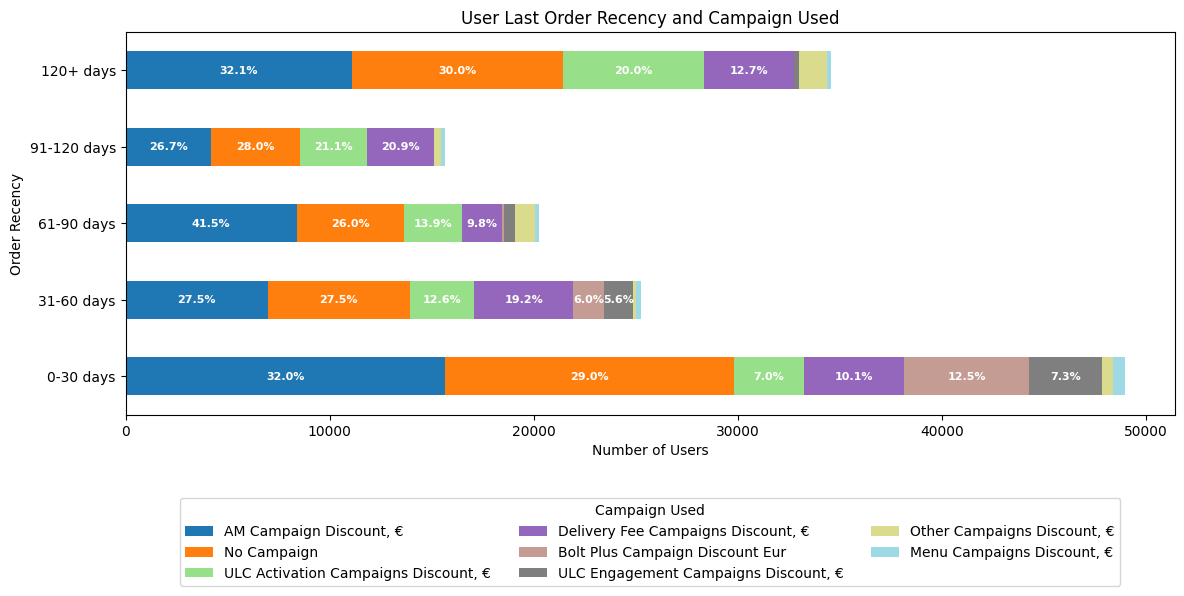

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/levankikadze/Desktop/cherningUsers/Data/UserOrdersTotal_past1yr_Breakdown.csv", index_col=0)

# Sort and deduplicate
df.sort_values(by='Order Created Date', ascending=False, inplace=True)
latest_order_dates = df.drop_duplicates(subset='User ID', keep='first')

# Convert date column
latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'], errors='coerce')

# Calculate recency
today = pd.Timestamp(datetime.today().date())
latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days

# Define recency bins
bins = [0, 30, 60, 90, 120, np.inf]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '120+ days']
latest_order_dates['order_recency'] = pd.cut(latest_order_dates['days_since_last_order'], bins=bins, labels=labels, right=True)

# Campaign columns
campaign_cols = [
    "Bolt Plus Campaign Discount Eur",
    "AM Campaign Discount, €",
    "MLC Churn Campaigns Discount, €",
    "MLC ELC Campaigns Discount, €",
    "Other Campaigns Discount, €",
    "Provider Campaigns Discount, €",
    "Store Campaign Discount, €",
    "ULC Activation Campaigns Discount, €",
    "ULC Engagement Campaigns Discount, €",
    "Cost-Share Delivery Fee Campaigns Spend by Bolt, €",
    "Cost-Share Menu Campaigns Spend by Bolt, €",
    "Delivery Fee Campaigns Discount, €",
    "Liquidity Campaigns Discount, €",
    "Marketing Campaigns Discount, €",
    "Menu Campaigns Discount, €"
]

# Clean up campaign values
for col in campaign_cols:
    latest_order_dates[col] = latest_order_dates[col].replace(r'[€,\\s]', '', regex=True).replace('', '0').astype(float)

# Assign campaign used
def get_campaign(row):
    for col in campaign_cols:
        if row[col] > 0:
            return col
    return 'No Campaign'

latest_order_dates['used_campaign'] = latest_order_dates.apply(get_campaign, axis=1)

# Group by recency and campaign
campaign_counts = latest_order_dates.groupby(['order_recency', 'used_campaign']).size().unstack(fill_value=0)

# 🖨️ Print summaries
print("\nCounts by Recency and Campaign:\n")
print(campaign_counts)

print("\n% by Recency (row-wise %):\n")
row_percentages = campaign_counts.div(campaign_counts.sum(axis=1), axis=0) * 100
print(row_percentages.round(1).astype(str) + "%")

print("\n% of Total per Campaign (column-wise):\n")
col_percentages = campaign_counts.sum() / campaign_counts.sum().sum() * 100
print(col_percentages.round(1).astype(str).sort_values(ascending=False) + "%")

# 🎨 Plot setup
top_campaigns = campaign_counts.sum().sort_values(ascending=False).head(8).index.tolist()
if 'No Campaign' not in top_campaigns:
    top_campaigns.append('No Campaign')
campaign_counts_plot = campaign_counts[top_campaigns]

fig, ax = plt.subplots(figsize=(12, 6))
campaign_counts_plot.plot(kind='barh', stacked=True, ax=ax, colormap='tab20')

plt.title('User Last Order Recency and Campaign Used')
plt.xlabel('Number of Users')
plt.ylabel('Order Recency')

# 📦 Move legend below
ax.legend(title='Campaign Used', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# 🏷️ Add % labels
percentages = campaign_counts_plot.div(campaign_counts_plot.sum(axis=1), axis=0) * 100
for i, (idx, row) in enumerate(percentages.iterrows()):
    left = 0
    for campaign in percentages.columns:
        value = campaign_counts_plot.loc[idx, campaign]
        percent = percentages.loc[idx, campaign]
        if value > 0 and percent > 5:
            ax.text(left + value/2, i, f"{percent:.1f}%", va='center', ha='center', color='white', fontsize=8, fontweight='bold')
        left += value

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # make space for the legend
plt.show()


Counts by recency and campaign:

used_campaign  AM Campaign Discount, €  Bolt Plus Campaign Discount Eur  \
order_recency                                                             
0-30 days                         2906                              363   
31-60 days                        1866                              137   
61-90 days                        3061                               17   
91-120 days                       1693                                0   
120+ days                         6582                                0   

used_campaign  Delivery Fee Campaigns Discount, €  \
order_recency                                       
0-30 days                                    1063   
31-60 days                                   1302   
61-90 days                                    718   
91-120 days                                  1737   
120+ days                                    3327   

used_campaign  MLC ELC Campaigns Discount, €  Menu Campaigns Discount

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_19903/1592406241.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_counts = latest_order_dates.groupby(['order_recency', 'used_campaign']).size().unstack(fill_value=0)


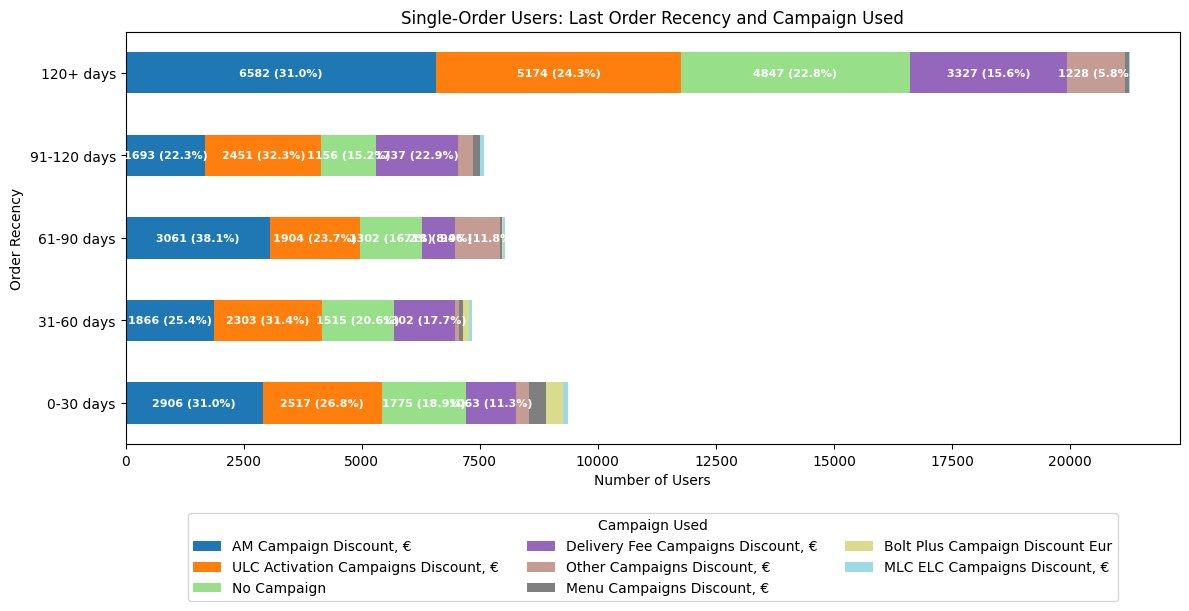

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/levankikadze/Desktop/cherningUsers/Data/UserOrdersTotal_past1yr_Breakdown.csv", index_col=0)

# Filter for users with only one order
user_counts = df['User ID'].value_counts()
single_order_users = user_counts[user_counts == 1].index
df_single = df[df['User ID'].isin(single_order_users)].copy()

# Sort by order date descending
df_single.sort_values(by='Order Created Date', ascending=False, inplace=True)

# Get latest order per user
latest_order_dates = df_single.drop_duplicates(subset='User ID', keep='first')

# Ensure 'Order Created Date' is datetime
latest_order_dates['Order Created Date'] = pd.to_datetime(latest_order_dates['Order Created Date'], errors='coerce')

# Calculate days since last order
today = pd.Timestamp(datetime.today().date())
latest_order_dates['days_since_last_order'] = (today - latest_order_dates['Order Created Date']).dt.days

# Define bins and labels
bins = [0, 30, 60, 90, 120, np.inf]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '120+ days']

# Categorize users by recency
latest_order_dates.loc[:, 'order_recency'] = pd.cut(latest_order_dates['days_since_last_order'], bins=bins, labels=labels, right=True)

# Campaign columns
campaign_cols = [
    "Bolt Plus Campaign Discount Eur",
    "AM Campaign Discount, €",
    "MLC Churn Campaigns Discount, €",
    "MLC ELC Campaigns Discount, €",
    "Other Campaigns Discount, €",
    "Provider Campaigns Discount, €",
    "Store Campaign Discount, €",
    "ULC Activation Campaigns Discount, €",
    "ULC Engagement Campaigns Discount, €",
    "Cost-Share Delivery Fee Campaigns Spend by Bolt, €",
    "Cost-Share Menu Campaigns Spend by Bolt, €",
    "Delivery Fee Campaigns Discount, €",
    "Liquidity Campaigns Discount, €",
    "Marketing Campaigns Discount, €",
    "Menu Campaigns Discount, €"
]

# Clean campaign columns
for col in campaign_cols:
    latest_order_dates.loc[:, col] = latest_order_dates[col].replace(r'[€,\\s]', '', regex=True).replace('', '0').astype(float)

# Detect which campaign was used
def get_campaign(row):
    for col in campaign_cols:
        if row[col] > 0:
            return col
    return 'No Campaign'

latest_order_dates.loc[:, 'used_campaign'] = latest_order_dates.apply(get_campaign, axis=1)

# Group by recency and campaign
campaign_counts = latest_order_dates.groupby(['order_recency', 'used_campaign']).size().unstack(fill_value=0)

# 📊 Print summary
print("Counts by recency and campaign:\n")
print(campaign_counts)

print("\nPercentages by recency and campaign (row-wise %):\n")
campaign_percentages = campaign_counts.div(campaign_counts.sum(axis=1), axis=0) * 100
print(campaign_percentages.round(1).astype(str) + "%")

print("\nPercentage of TOTAL per campaign (column-wise %):\n")
campaign_totals = campaign_counts.sum()
campaign_total_percentages = (campaign_totals / campaign_totals.sum()) * 100
print((campaign_total_percentages.round(1).astype(str) + "%").sort_values(ascending=False))

# 📈 Plotting
top_campaigns = campaign_totals.sort_values(ascending=False).head(8).index.tolist()
if 'No Campaign' not in top_campaigns:
    top_campaigns.append('No Campaign')
campaign_counts_plot = campaign_counts[top_campaigns]

fig, ax = plt.subplots(figsize=(12, 6))
campaign_counts_plot.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='tab20'
)

plt.title('Single-Order Users: Last Order Recency and Campaign Used')
plt.xlabel('Number of Users')
plt.ylabel('Order Recency')

# Move legend below plot
ax.legend(
    title='Campaign Used',
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=3
)

# Add percentage labels inside bars
campaign_percentages_plot = campaign_counts_plot.div(campaign_counts_plot.sum(axis=1), axis=0) * 100
for i, (idx, row) in enumerate(campaign_percentages_plot.iterrows()):
    left = 0
    for campaign in campaign_percentages_plot.columns:
        value = campaign_counts_plot.loc[idx, campaign]
        percent = campaign_percentages_plot.loc[idx, campaign]
        if value > 0 and percent > 5:
            ax.text(left + value/2, i, f"{value} ({percent:.1f}%)", va='center', ha='center', color='white', fontsize=8, fontweight='bold')
        left += value

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # make space for the legend
plt.show()


In [45]:

#import and clean data
import pandas as pd
import numpy as np
from datetime import datetime
import json 
import plotly.express as px
import plotly.graph_objects as go 
import plotly.subplots as make_subplots

df = pd.read_csv(
    '/Users/levankikadze/Desktop/pandas/Bolt Food/cherningUsers/Data/UserOrdersTotal_past1yr_Breakdown_ShulaGiven.csv',
    dtype={'Spend Objective': str, 'Discount Value Local': 'float'},
    thousands=',',
    )

df.dropna(subset=['Order ID'], inplace=True)
df[['Order ID', 'User ID', 'Provider ID', 'Vendor ID']] = df[['Order ID', 'User ID', 'Provider ID', 'Vendor ID']].astype(int)
df['Order Created Date'] = pd.to_datetime(df['Order Created Date'])

campaigns = df['Spend Objective'].astype(str).str.lower()

conditions = [
    campaigns.isin(['activation', 'reactivation', 'churn', 'engagement', 'acquisition', 'experiment']),
    campaigns == 'provider_campaign_portal',
    campaigns.str.startswith('provider_campaign_'),
    campaigns == 'marketing',
    campaigns.str.startswith('sp_'),
    campaigns == 'bolt_plus_campaign',
    campaigns == 'other',
    campaigns == 'NaN'
]

choices = [
    'marketplace_campaigns',
    'portal_campaigns',
    'am_campaigns',
    'marketing',
    'smart_promotions',
    'bolt_plus',
    'other_campaigns',
    'no_campaign'
]

df['Spend Objective'] = np.select(conditions, choices, default='no_campaign')

#Deduplicate the DataFrame
#Assign priority to each campaign type
priority = {
    # the ranking of top 3 does not matter cause they don't overlap and they should be prioritized over campaigns that overlap
    'marketing': 1,
    'am_campaigns': 2,
    'portal_campaigns': 3, 
    'smart_promotions': 4,
    'marketplace_campaigns': 5,
    'bolt_plus': 6,
    'other_campaigns': 7,
    'no_campaign': 8,
}

# Map the priority to the DataFrame
df['Priority'] = df['Spend Objective'].map(priority)

# Sort the DataFrame by 'User ID' and 'Priority'
df.sort_values(by=['Order ID', 'Priority'], inplace=True)

# Drop duplicates, keeping the first occurrence
df_deduplicated = (
    df.drop_duplicates(subset=['Order ID'], keep='first')
      .drop(columns=['Priority'])
      .copy()
)
#Run the last order analysis on the deduplicated DataFrame
df_last_orders = (df_deduplicated.sort_values(by=['User ID', 'Order Created Date'], ascending=False).drop_duplicates(subset=['User ID'], keep='first'))
# Make the needed columns
df_last_orders['days_since_last_order'] = (
    pd.Timestamp(datetime.today().date()) -
    df_last_orders['Order Created Date']
).dt.days
df_last_orders['used_discount'] = df_last_orders['Discount Value Local'] > 0

# Define bins & labels
bins   = [0, 30, 60, 90, 120, np.inf]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']

df_last_orders['recency_group'] = pd.cut(
    df_last_orders['days_since_last_order'],
    bins=bins,
    labels=labels,
    right=True
)

# Group & pivot for counts
counts = (
    df_last_orders
      .groupby(['recency_group', 'used_discount'], observed=True)
      .size()
      .unstack(fill_value=0)
      .rename(columns={False:'No Discount', True:'Used Discount'})
)

# (4) Calculate percentages
pct = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)
pct.columns = [c + ' %' for c in pct.columns]

# (5) Combine into one clean table
summary = counts.join(pct)
print(summary)


# (6) Breakdown of discount types among those who used a discount
discount_breakdown = (
    df_last_orders[df_last_orders['used_discount']]       # filter to only “used discount”
      .groupby(['recency_group', 'Spend Objective'], observed=True)  # group by recency and discount type
      .size()
      .unstack(fill_value=0)
)

# (7) Turn those into percentages of the “used discount” total per bucket
discount_pct = (
    discount_breakdown
      .div(discount_breakdown.sum(axis=1), axis=0)
      .mul(100)
      .round(1)
      .add_suffix(' %')
)

# (8) Put counts and % side by side
discount_summary = discount_breakdown.join(discount_pct)

print(discount_summary)

# run the same analysis on one time users
# — Identify users with exactly one order —
order_counts = df_deduplicated['User ID'].value_counts()
single_users = order_counts[order_counts == 1].index

# — Filter to only those single‑order rows —
df_single = df_deduplicated[df_deduplicated['User ID'].isin(single_users)].copy()

# — Now rerun your “last order” steps on df_single —
# (since each user has only one order, it already is their “last”)
df_single['days_since_last_order'] = (
    pd.Timestamp(datetime.today().date()) -
    df_single['Order Created Date']
).dt.days
df_single['used_discount'] = df_single['Discount Value Local'] > 0

# — Bin into recency groups —
df_single['recency_group'] = pd.cut(
    df_single['days_since_last_order'],
    bins=[0,30,60,90,120,np.inf],
    labels=['0-30','31-60','61-90','91-120','120+'],
    right=True
)

# — 1) Counts & percentages of discount usage —
counts_single = (
    df_single
      .groupby(['recency_group','used_discount'], observed=True)
      .size()
      .unstack(fill_value=0)
      .rename(columns={False:'No Discount', True:'Used Discount'})
)
pct_single = counts_single.div(counts_single.sum(axis=1), axis=0).mul(100).round(1)
pct_single.columns = [c + ' %' for c in pct_single.columns]
summary_single = counts_single.join(pct_single)
print(summary_single)

# — 2) Breakdown of which campaign‑type discounts were used —
discount_breakdown_single = (
    df_single[df_single['used_discount']]
      .groupby(['recency_group','Spend Objective'], observed=True)
      .size()
      .unstack(fill_value=0)
)
discount_pct_single = (
    discount_breakdown_single
      .div(discount_breakdown_single.sum(axis=1), axis=0)
      .mul(100)
      .round(1)
      .add_suffix(' %')
)
discount_summary_single = discount_breakdown_single.join(discount_pct_single)
print(discount_summary_single)



               No Discount  Used Discount  No Discount %  Used Discount %
recency_group                                                            
0-30                 13110          37132           26.1             73.9
31-60                 6462          18933           25.4             74.6
61-90                 4776          14802           24.4             75.6
91-120                4050          12129           25.0             75.0
120+                 36358         103049           26.1             73.9
Spend Objective  am_campaigns  bolt_plus  marketing  marketplace_campaigns  \
recency_group                                                                
0-30                    16027       2185        404                  12849   
31-60                    5432        707        160                   9901   
61-90                    6138         44        747                   5793   
91-120                   2932          0        678                   6771   
120+          

In [ ]:
# ---------- ANALYSIS FUNCTION ----------
def analyze_discount_usage(df, group_name):
    """
    Analyzes discount usage patterns in a user order DataFrame
    Returns two DataFrames: discount_summary, discount_type_breakdown
    """
    # Create working copy and calculate fields
    df = df.copy()
    df['days_since_last_order'] = (pd.Timestamp(datetime.today().date()) - df['Order Created Date']).dt.days
    df['used_discount'] = df['Discount Value Local'] > 0
    
    # Bin recency
    bins = [0, 30, 60, 90, 120, np.inf]
    labels = ['0-30', '31-60', '61-90', '91-120', '120+']
    df['recency_group'] = pd.cut(df['days_since_last_order'], bins=bins, labels=labels, right=True)
    
    # 1. Discount usage summary
    counts = (
        df.groupby(['recency_group', 'used_discount'], observed=True)
        .size()
        .unstack(fill_value=0)
        .rename(columns={False: 'No Discount', True: 'Used Discount'})
    )
    pct = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)
    pct.columns = [c + ' %' for c in pct.columns]
    discount_summary = counts.join(pct)
    
    # 2. Discount type breakdown
    discount_breakdown = (
        df[df['used_discount']]
        .groupby(['recency_group', 'Spend Objective'], observed=True)
        .size()
        .unstack(fill_value=0)
    )
    discount_pct = (
        discount_breakdown
        .div(discount_breakdown.sum(axis=1), axis=0)
        .mul(100)
        .round(1)
        .add_suffix(' %')
    )
    discount_type_breakdown = discount_breakdown.join(discount_pct)
    
    # Print results with group label
    print(f"\n{'='*50}\nAnalysis for: {group_name}\n{'='*50}")
    print("\nDiscount Usage Summary:")
    print(discount_summary)
    print("\nDiscount Type Breakdown:")
    print(discount_type_breakdown)
    
    return discount_summary, discount_type_breakdown
# ---------- END FUNCTION ----------

# Main data processing
df = pd.read_csv(
    '/Users/levankikadze/Desktop/pandas/Bolt Food/cherningUsers/Data/UserOrdersTotal_past1yr_Breakdown_ShulaGiven.csv',
    dtype={'Spend Objective': str, 'Discount Value Local': 'float'},
    thousands=',',
)

df.dropna(subset=['Order ID'], inplace=True)
df[['Order ID', 'User ID', 'Provider ID', 'Vendor ID']] = df[['Order ID', 'User ID', 'Provider ID', 'Vendor ID']].astype(int)
df['Order Created Date'] = pd.to_datetime(df['Order Created Date'])

campaigns = df['Spend Objective'].astype(str).str.lower()

conditions = [
    campaigns.isin(['activation', 'reactivation', 'churn', 'engagement', 'acquisition', 'experiment']),
    campaigns == 'provider_campaign_portal',
    campaigns.str.startswith('provider_campaign_'),
    campaigns == 'marketing',
    campaigns.str.startswith('sp_'),
    campaigns == 'bolt_plus_campaign',
    campaigns == 'other',
    campaigns == 'NaN'
]

choices = [
    'marketplace_campaigns',
    'portal_campaigns',
    'am_campaigns',
    'marketing',
    'smart_promotions',
    'bolt_plus',
    'other_campaigns',
    'no_campaign'
]

df['Spend Objective'] = np.select(conditions, choices, default='no_campaign')

# Deduplicate
priority = {
    'marketing': 1,
    'am_campaigns': 2,
    'portal_campaigns': 3, 
    'smart_promotions': 4,
    'marketplace_campaigns': 5,
    'bolt_plus': 6,
    'other_campaigns': 7,
    'no_campaign': 8,
}

df['Priority'] = df['Spend Objective'].map(priority)
df.sort_values(by=['Order ID', 'Priority'], inplace=True)
df_deduplicated = (
    df.drop_duplicates(subset=['Order ID'], keep='first')
    .drop(columns=['Priority'])
    .copy()
)

# Last order analysis
df_last_orders = (
    df_deduplicated
    .sort_values(by=['User ID', 'Order Created Date'], ascending=False)
    .drop_duplicates(subset=['User ID'], keep='first')
)

# Single order users
order_counts = df_deduplicated['User ID'].value_counts()
single_users = order_counts[order_counts == 1].index
df_single = df_deduplicated[df_deduplicated['User ID'].isin(single_users)].copy()

# Run analyses using the function
all_users_summary, all_users_breakdown = analyze_discount_usage(df_last_orders, "All Users (Last Order)")
single_users_summary, single_users_breakdown = analyze_discount_usage(df_single, "Single Order Users")


Analysis for: All Users (Last Order)

Discount Usage Summary:
               No Discount  Used Discount  No Discount %  Used Discount %
recency_group                                                            
0-30                 13110          37132           26.1             73.9
31-60                 6462          18933           25.4             74.6
61-90                 4776          14802           24.4             75.6
91-120                4050          12129           25.0             75.0
120+                 36358         103049           26.1             73.9

Discount Type Breakdown:
Spend Objective  am_campaigns  bolt_plus  marketing  marketplace_campaigns  \
recency_group                                                                
0-30                    16027       2185        404                  12849   
31-60                    5432        707        160                   9901   
61-90                    6138         44        747                   5793   
91-

In [ ]:
def create_discount_usage_chart(summary_data, title_suffix):
    """Create horizontal discount usage chart"""
    # Prepare data
    usage_data = summary_data.reset_index()
    usage_data = usage_data.melt(id_vars=['recency_group'], 
                                 value_vars=['No Discount', 'Used Discount'],
                                 var_name='Discount Status', 
                                 value_name='Count')

    # Calculate percentages
    usage_data['Total'] = usage_data.groupby('recency_group')['Count'].transform('sum')
    usage_data['Percentage'] = (usage_data['Count'] / usage_data['Total'] * 100).round(1)
    usage_data['Text Label'] = usage_data.apply(
        lambda x: f"{x['Count']:,}<br>({x['Percentage']:.1f}%)", axis=1
    )

    # Calculate maximum value for consistent x-axis scaling
    max_value = usage_data['Total'].max()
    
    # Create chart
    fig = go.Figure()
    
    for status in ['Used Discount', 'No Discount']:
        data_subset = usage_data[usage_data['Discount Status'] == status]
        fig.add_trace(go.Bar(
            y=data_subset['recency_group'],
            x=data_subset['Count'],
            name=status,
            orientation='h',
            text=data_subset['Text Label'],
            textposition='inside',
            textfont=dict(color='white', size=10),
            hovertemplate=(
                "<b>Recency Group</b>: %{y}<br>"
                "<b>Discount Status</b>: " + status + "<br>"
                "<b>User Count</b>: %{x:,}<br>"
                "<b>Percentage</b>: %{customdata:.1f}%<extra></extra>"
            ),
            customdata=data_subset['Percentage']
        ))

    # Update layout with consistent x-axis scaling
    fig.update_layout(
        title=f'Discount Usage: {title_suffix}',
        yaxis_title='Days Since Last Order',
        xaxis_title='Number of Users',
        barmode='stack',
        plot_bgcolor='white',
        hovermode='y unified',
        legend=dict(
            title='Discount Status',
            orientation='h',
            yanchor='bottom',
            y=-0.25,
            xanchor='center',
            x=0.5
        ),
        height=500,
        margin=dict(t=60, b=120, l=80, r=40),
        xaxis=dict(range=[0, max_value * 1.15])  # Add padding
    )
    
    fig.add_annotation(
        xref='paper', yref='paper',
        x=0.5, y=-0.35,
        text='Recency groups show time since last order in days | Percentages show group composition',
        showarrow=False,
        font=dict(size=10, color='grey'))
    
    return fig

def create_discount_type_chart(breakdown_data, title_suffix):
    """Create horizontal discount type breakdown chart"""
    # Prepare data - get only count columns
    breakdown_data = breakdown_data.reset_index()
    
    # Filter out percentage columns
    count_columns = [col for col in breakdown_data.columns if '%' not in col and col != 'recency_group']
    melted_data = breakdown_data.melt(
        id_vars='recency_group', 
        value_vars=count_columns,
        var_name='Discount Type', 
        value_name='Count'
    )
    
    # Calculate percentages
    melted_data['Total Discount Users'] = melted_data.groupby('recency_group')['Count'].transform('sum')
    melted_data['Percentage'] = (melted_data['Count'] / melted_data['Total Discount Users'] * 100).round(1)
    melted_data['Text Label'] = melted_data.apply(
        lambda x: f"{x['Count']:,}<br>({x['Percentage']:.1f}%)", axis=1
    )

    # Calculate maximum value for consistent x-axis scaling
    max_value = melted_data['Total Discount Users'].max()
    
    # Create chart
    fig = go.Figure()
    colors = px.colors.qualitative.Plotly
    
    # Handle case where there might be no discount users
    if melted_data.empty:
        fig.add_annotation(
            xref='paper', yref='paper',
            x=0.5, y=0.5,
            text='No discount users found',
            showarrow=False,
            font=dict(size=20))
        return fig

    for i, discount_type in enumerate(melted_data['Discount Type'].unique()):
        data_subset = melted_data[melted_data['Discount Type'] == discount_type]
        fig.add_trace(go.Bar(
            y=data_subset['recency_group'],
            x=data_subset['Count'],
            name=discount_type,
            orientation='h',
            marker_color=colors[i % len(colors)],
            text=data_subset['Text Label'],
            textposition='inside',
            textfont=dict(color='white', size=10),
            hovertemplate=(
                "<b>Recency Group</b>: %{y}<br>"
                "<b>Discount Type</b>: " + discount_type + "<br>"
                "<b>User Count</b>: %{x:,}<br>"
                "<b>Percentage</b>: %{customdata:.1f}%<extra></extra>"
            ),
            customdata=data_subset['Percentage']
        ))

    # Update layout with consistent x-axis scaling
    fig.update_layout(
        title=f'Discount Type Breakdown: {title_suffix}',
        yaxis_title='Days Since Last Order',
        xaxis_title='Number of Discount Users',
        barmode='stack',
        plot_bgcolor='white',
        hovermode='y unified',
        legend=dict(
            title='Discount Type',
            orientation='h',
            yanchor='bottom',
            y=-0.4,
            xanchor='center',
            x=0.5
        ),
        height=600,
        margin=dict(t=60, b=150, l=80, r=40),
        xaxis=dict(range=[0, max_value * 1.15])  # Add padding
    )
    
    fig.add_annotation(
        xref='paper', yref='paper',
        x=0.5, y=-0.45,
        text='Recency groups show time since last order in days | Percentages show proportion within discount users',
        showarrow=False,
        font=dict(size=10, color='grey'))
    
    return fig

# ==============================================================================
# Create All Visualizations
# ==============================================================================

# Original analysis (last orders)
fig1 = create_discount_usage_chart(all_users_summary, "All Users (Last Order)")
fig2 = create_discount_type_chart(all_users_breakdown, "All Users (Last Order)")

# One-time user analysis
fig3 = create_discount_usage_chart(single_users_summary, "One-Time Users")
fig4 = create_discount_type_chart(single_users_breakdown, "One-Time Users")

# ==============================================================================
# Save to HTML
# ==============================================================================

with open("discount_analysis_complete.html", "w") as f:
    # Include Plotly JS once
    f.write(fig1.to_html(full_html=True, include_plotlyjs="cdn"))
    
    # The rest are just <div> blocks
    for fig in (fig2, fig3, fig4):
        f.write(fig.to_html(full_html=False, include_plotlyjs=False))

print("All visualizations saved to 'discount_analysis_complete.html'")

All visualizations saved to 'discount_analysis_complete.html'


/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_34688/61552787.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_34688/61552787.py:87: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_34688/61552787.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c000

In [44]:
def create_discount_usage_chart(summary_data, title_suffix):
    """Create horizontal discount usage chart"""
    # Prepare data
    usage_data = summary_data.reset_index()
    usage_data = usage_data.melt(id_vars=['recency_group'], 
                                 value_vars=['No Discount', 'Used Discount'],
                                 var_name='Discount Status', 
                                 value_name='Count')

    # Calculate percentages
    usage_data['Total'] = usage_data.groupby('recency_group')['Count'].transform('sum')
    usage_data['Percentage'] = (usage_data['Count'] / usage_data['Total'] * 100).round(1)
    usage_data['Text Label'] = usage_data.apply(
        lambda x: f"{x['Count']:,}<br>({x['Percentage']:.1f}%)", axis=1
    )

    # Calculate maximum value for consistent x-axis scaling
    max_value = usage_data['Total'].max()
    
    # Create chart
    fig = go.Figure()
    
    for status in ['Used Discount', 'No Discount']:
        data_subset = usage_data[usage_data['Discount Status'] == status]
        fig.add_trace(go.Bar(
            y=data_subset['recency_group'],
            x=data_subset['Count'],
            name=status,
            orientation='h',
            text=data_subset['Text Label'],
            textposition='inside',
            textfont=dict(color='white', size=10),
            hovertemplate=(
                "<b>Recency Group</b>: %{y}<br>"
                "<b>Discount Status</b>: " + status + "<br>"
                "<b>User Count</b>: %{x:,}<br>"
                "<b>Percentage</b>: %{customdata:.1f}%<extra></extra>"
            ),
            customdata=data_subset['Percentage']
        ))

    # Update layout with consistent x-axis scaling
    fig.update_layout(
        title=f'Discount Usage: {title_suffix}',
        yaxis_title='Days Since Last Order',
        xaxis_title='Number of Users',
        barmode='stack',
        plot_bgcolor='white',
        hovermode='y unified',
        legend=dict(
            title='Discount Status',
            orientation='h',
            yanchor='bottom',
            y=-0.25,
            xanchor='center',
            x=0.5
        ),
        height=500,
        margin=dict(t=60, b=120, l=80, r=40),
        xaxis=dict(range=[0, max_value * 1.15])  # Add padding
    )
    
    fig.add_annotation(
        xref='paper', yref='paper',
        x=0.5, y=-0.35,
        text='Recency groups show time since last order in days | Percentages show group composition',
        showarrow=False,
        font=dict(size=10, color='grey'))
    
    return fig

def create_discount_type_chart(breakdown_data, title_suffix):
    """Create horizontal discount type breakdown chart"""
    # Prepare data - get only count columns
    breakdown_data = breakdown_data.reset_index()
    
    # Filter out percentage columns
    count_columns = [col for col in breakdown_data.columns if '%' not in col and col != 'recency_group']
    melted_data = breakdown_data.melt(
        id_vars='recency_group', 
        value_vars=count_columns,
        var_name='Discount Type', 
        value_name='Count'
    )
    
    # Calculate percentages
    melted_data['Total Discount Users'] = melted_data.groupby('recency_group')['Count'].transform('sum')
    melted_data['Percentage'] = (melted_data['Count'] / melted_data['Total Discount Users'] * 100).round(1)
    melted_data['Text Label'] = melted_data.apply(
        lambda x: f"{x['Count']:,}<br>({x['Percentage']:.1f}%)", axis=1
    )

    # Calculate maximum value for consistent x-axis scaling
    max_value = melted_data['Total Discount Users'].max()
    
    # Create chart
    fig = go.Figure()
    colors = px.colors.qualitative.Plotly
    
    # Handle case where there might be no discount users
    if melted_data.empty:
        fig.add_annotation(
            xref='paper', yref='paper',
            x=0.5, y=0.5,
            text='No discount users found',
            showarrow=False,
            font=dict(size=20))
        return fig

    for i, discount_type in enumerate(melted_data['Discount Type'].unique()):
        data_subset = melted_data[melted_data['Discount Type'] == discount_type]
        fig.add_trace(go.Bar(
            y=data_subset['recency_group'],
            x=data_subset['Count'],
            name=discount_type,
            orientation='h',
            marker_color=colors[i % len(colors)],
            text=data_subset['Text Label'],
            textposition='inside',
            textfont=dict(color='white', size=10),
            hovertemplate=(
                "<b>Recency Group</b>: %{y}<br>"
                "<b>Discount Type</b>: " + discount_type + "<br>"
                "<b>User Count</b>: %{x:,}<br>"
                "<b>Percentage</b>: %{customdata:.1f}%<extra></extra>"
            ),
            customdata=data_subset['Percentage']
        ))

    # Update layout with consistent x-axis scaling
    fig.update_layout(
        title=f'Discount Type Breakdown: {title_suffix}',
        yaxis_title='Days Since Last Order',
        xaxis_title='Number of Discount Users',
        barmode='stack',
        plot_bgcolor='white',
        hovermode='y unified',
        legend=dict(
            title='Discount Type',
            orientation='h',
            yanchor='bottom',
            y=-0.4,
            xanchor='center',
            x=0.5
        ),
        height=600,
        margin=dict(t=60, b=150, l=80, r=40),
        xaxis=dict(range=[0, max_value * 1.15])  # Add padding
    )
    
    fig.add_annotation(
        xref='paper', yref='paper',
        x=0.5, y=-0.45,
        text='Recency groups show time since last order in days | Percentages show proportion within discount users',
        showarrow=False,
        font=dict(size=10, color='grey'))
    
    return fig

# ==============================================================================
# Create All Visualizations
# ==============================================================================

# Original analysis (last orders)
fig1 = create_discount_usage_chart(all_users_summary, "All Users (Last Order)")
fig2 = create_discount_type_chart(all_users_breakdown, "All Users (Last Order)")

# One-time user analysis
fig3 = create_discount_usage_chart(single_users_summary, "One-Time Users")
fig4 = create_discount_type_chart(single_users_breakdown, "One-Time Users")

# ==============================================================================
# Save to HTML
# ==============================================================================

with open("discount_analysis_complete.html", "w") as f:
    # Include Plotly JS once
    f.write(fig1.to_html(full_html=True, include_plotlyjs="cdn"))
    
    # The rest are just <div> blocks
    for fig in (fig2, fig3, fig4):
        f.write(fig.to_html(full_html=False, include_plotlyjs=False))

print("All visualizations saved to 'discount_analysis_complete.html'")

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_34688/61552787.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_34688/61552787.py:87: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c0000gn/T/ipykernel_34688/61552787.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/q4/9fmh2gnj57lgm7stdq1z_66c000

All visualizations saved to 'discount_analysis_complete.html'
